<a href="https://colab.research.google.com/github/morteza/notebooks/blob/master/Rose_Plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set('notebook',style='ticks')

import numpy as np
import pandas as pd
from math import radians

## Generate mock data

### required columns:

- `task`
- `field_1`
- `field_2`
- ...
- `field_n`

In [2]:
n_tasks = 20

# data
data = pd.DataFrame({
  'task': ['task ' + str(i) for i in list(range(1, n_tasks+1)) ],
  'psychology': np.random.randint(low=1, high=10, size=n_tasks),
  'neuroscience': np.random.randint(low=1, high=10, size=n_tasks),
  'cognitive': np.random.randint(low=1, high=10, size=n_tasks),
  'social': np.random.randint(low=1, high=10, size=n_tasks),
})

# sort data by one of the columns
data = data.sort_values(by=data.columns[1], ascending=False).reset_index()

Now define a function to plot rose plot given a propoer data frame.

In [3]:
def rose_plot(data: pd.DataFrame):

  # create the plot
  fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(polar=True))

  ax = plt.subplot(polar=True)

  polar_ticks = np.linspace(0., 2*np.pi, data['task'].nunique() + 1)
  plt.xticks(polar_ticks[:-1], data['task'])

  # If you want the first axis to be on top:
  ax.set_theta_offset(np.pi / 2)
  ax.set_theta_direction(-1)

  # Draw ylabels
  ax.set_rlabel_position(0)
  ax.set_yticklabels([])

  bar_width = 2 * np.pi / len(data)
  bar_x = [i * bar_width for i in data.index]

  plt.ylim(0, data.drop(columns=['task','index']).max().max() + 0.5)


  for col in data.columns:
    if col in ['task', 'index']:
      continue   

    bars = ax.fill(bar_x,
                  data[col],
                  edgecolor='white',
                  label=col,
                  alpha=0.5)

  plt.legend()
  plt.show()


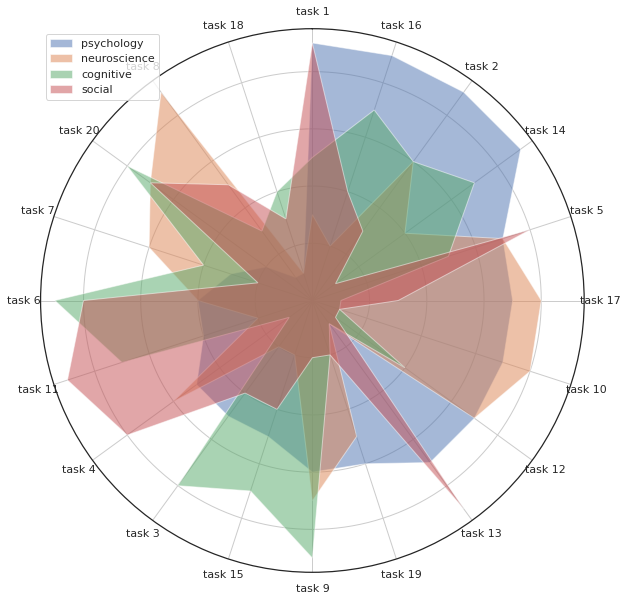

In [4]:
# plot it

rose_plot(data)